In [23]:
import IPython
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import pandas as pd 
import csv

In [24]:
x_train=np.load('train_x.npy')
x_test=np.load('test_x.npy')
y_train=np.load('train_y.npy')

In [25]:
train_set_x_flatten = x_train.reshape(x_train.shape[2],x_train.shape[0]*x_train.shape[1]).T
test_set_x_flatten = x_test.reshape(x_test.shape[2],x_test.shape[0]*x_test.shape[1]).T
train_set_y_flatten = y_train.reshape(1,x_train.shape[0]*x_train.shape[1]).T

In [26]:
num_classes=int(max(train_set_y_flatten)[0]+1)
y= to_categorical(train_set_y_flatten,num_classes)

In [27]:
xt = train_set_x_flatten[0:int(len(train_set_x_flatten)*0.7),:]
xv = train_set_x_flatten[int(len(train_set_x_flatten)*0.7):len(train_set_x_flatten),:]
yt = y[0:int(len(y)*0.7),:]
yv = y[int(len(y)*0.7):len(y),:]

In [28]:
model = Sequential()
model.add(Dense(103, activation="relu"))
model.add(Dense(80, activation="relu"))
model.add(Dense(60, activation="relu"))
model.add(Dense(40, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

In [29]:
batch_size = 512
epoch = 20
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['acc'])
output=model.fit(xt,yt,epochs=epoch, batch_size=batch_size, validation_data=(xv,yv))

Epoch 1/20
145/145 [==============================] - 1s 2ms/step - loss: 5.5653 - acc: 0.7522 - val_loss: 1.0685 - val_acc: 0.7895
Epoch 2/20
145/145 [==============================] - 0s 1ms/step - loss: 0.3508 - acc: 0.8354 - val_loss: 0.7105 - val_acc: 0.7940
Epoch 3/20
145/145 [==============================] - 0s 1ms/step - loss: 0.2009 - acc: 0.8480 - val_loss: 0.5558 - val_acc: 0.8015
Epoch 4/20
145/145 [==============================] - 0s 1ms/step - loss: 0.1524 - acc: 0.8566 - val_loss: 0.4607 - val_acc: 0.8174
Epoch 5/20
145/145 [==============================] - 0s 1ms/step - loss: 0.1302 - acc: 0.8617 - val_loss: 0.4023 - val_acc: 0.8256
Epoch 6/20
145/145 [==============================] - 0s 1ms/step - loss: 0.1187 - acc: 0.8645 - val_loss: 0.3721 - val_acc: 0.8304
Epoch 7/20
145/145 [==============================] - 0s 1ms/step - loss: 0.1116 - acc: 0.8661 - val_loss: 0.3597 - val_acc: 0.8282
Epoch 8/20
145/145 [==============================] - 0s 1ms/step - loss: 0.

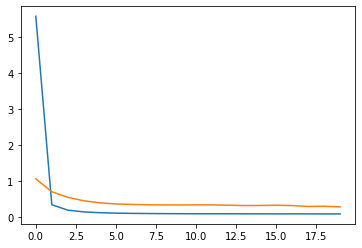

In [30]:
mod_loss = output.history['loss']
mod_val_loss = output.history['val_loss']
plt.plot(mod_loss, label='mod_loss')
plt.plot(mod_val_loss, label='mod_val_loss')

In [31]:
y_train_acc=model.predict(train_set_x_flatten)
yb=[]
for i in range(y_train_acc.shape[0]):
    yb.append(np.argmax(y_train_acc[i,:]))
a=np.array(yb)

In [32]:
e=0
for i in range(len(a)):
    if a[i] == train_set_y_flatten[i]:
        e=e+1
print("Precision: ",e/len(a)*100,"%")

Precision:  85.62903225806451 %


In [34]:
y_test=model.predict(test_set_x_flatten)
yt=[]
for i in range(y_test.shape[0]):
    yt.append(np.argmax(y_test[i,:]))
sample=np.array(yt)
sample=sample.reshape(len(sample),1)
s = np.linspace(0,len(sample)-1,len(sample))
s=s.reshape(len(s),1)
sample1 = np.concatenate((s,sample),axis=1)
np.savetxt('a.csv',sample1)

3012
